## IMPORTING ALL THE NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')
import yfinance as yf
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [3]:
df=yf.download('BTC-USD' , start='2018-01-01' , end='2022-01-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.to_csv('BTC-USD.csv')

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523


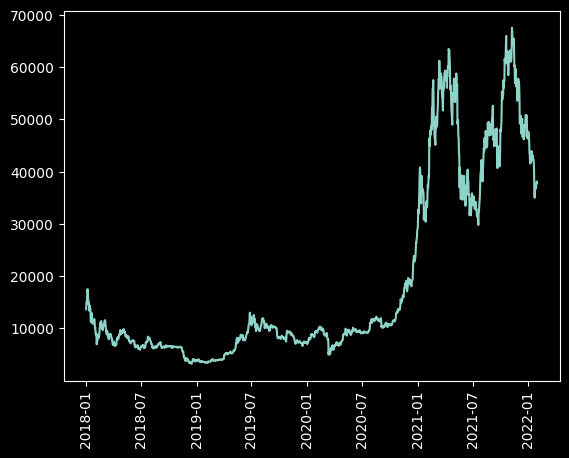

In [6]:
plt.plot(df['Close'])
plt.xticks(rotation=90)
plt.show()

## TRAIN TEST SPLIT

In [7]:
to_row=int(0.8*len(df))
train=list(df[:to_row]['Adj Close'])
test=list(df[to_row:]['Adj Close'])
print(len(train))
print(len(test))

1192
299


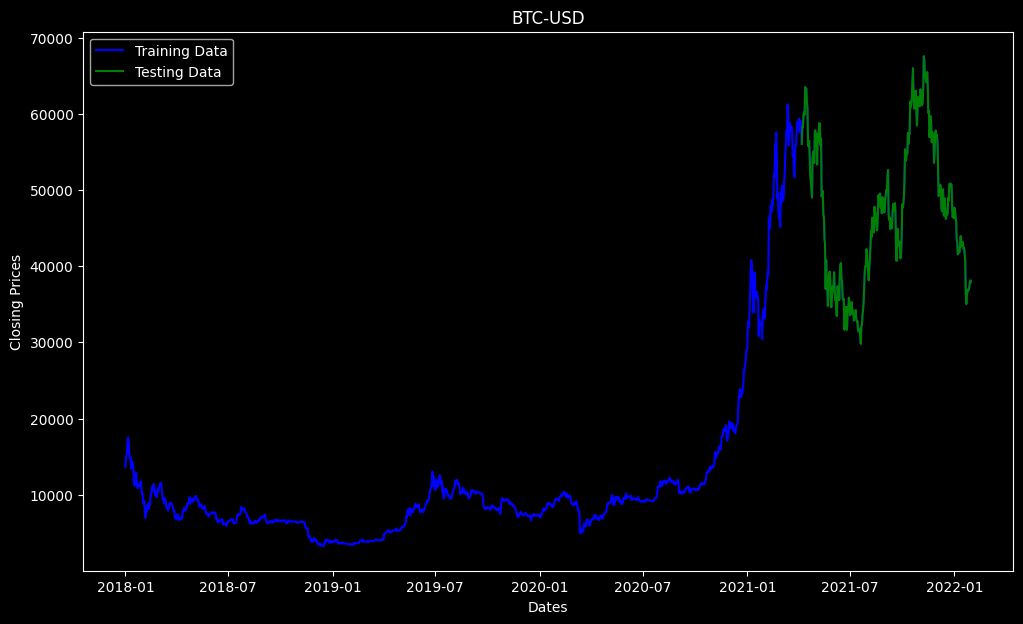

In [8]:
plt.figure(figsize=(12,7))
plt.title('BTC-USD')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Adj Close'] , 'blue' , label='Training Data')
plt.plot(df[to_row:]['Adj Close'] , 'green' , label='Testing Data')
plt.legend()

In [9]:
model_predictions=[]
no_of_predictions=len(test)
print(no_of_predictions)

299


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
for i in range(no_of_predictions):
    train.append(test[i])
    model = SARIMAX(train, order=(2, 1, 0))
    model_fit = model.fit(disp=0)
    predictions = model_fit.forecast()
    yhat = list(predictions)[0]
    model_predictions.append(yhat)
    actual_value=test[i]
    train.append(actual_value)

In [25]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3013
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -25595.827
Date:                Tue, 02 Jan 2024   AIC                          51199.654
Time:                        21:31:39   BIC                          51223.695
Sample:                             0   HQIC                         51208.300
                               - 3013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0116      0.026      0.449      0.653      -0.039       0.062
ar.L2         -0.0184      0.013     -1.431      0.153      -0.044       0.007
ar.L3          0.0169      0.028      0.593      0.5

ValueError: x and y must have same first dimension, but have shapes (299,) and (925,)

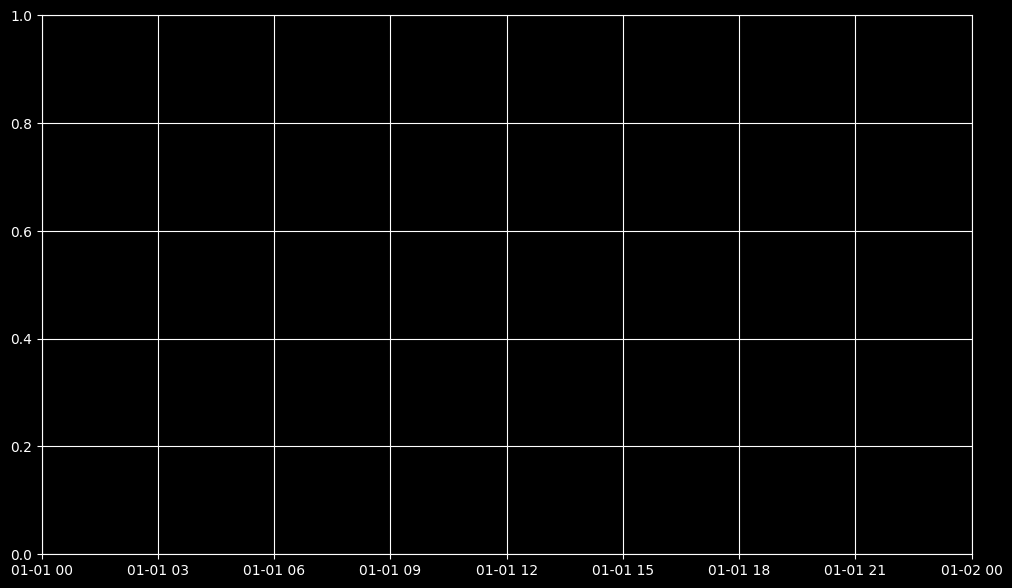

In [27]:
plt.figure(figsize=(12,7))
plt.grid(True)
date_range = df[to_row:].index[:len(model_predictions)]
plt.plot(date_range , model_predictions , color='blue' , marker='o' , linestyle='dashed' , label='Predicted Price')
plt.plot(date_range , test , color='red' , label='Actual Price')
plt.legend()
plt.title('BTC-USD Prices Prediction using ARIMA model')

In [19]:
mse_error=mean_squared_error(test , model_predictions)
mae_error=mean_absolute_error(test , model_predictions)
print('MSE Error : {}'.format(mse_error))
print('MAE Error : {}'.format(mae_error)) 
accuracy=100-(mae_error/np.mean(test))*100
print('Accuracy : {}'.format(accuracy))


MSE Error : 398.4044578213722
MAE Error : 13.851826861461769
Accuracy : 99.9706664435214


In [21]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test))/np.abs(np.array(test)))
print('MAPE : {}'.format(mape))
#print accuracy percentage
print('Accuracy : {}'.format(100 - mape*100))

MAPE : 0.00030158674603829837
Accuracy : 99.96984132539617
